# Working With Time Series in Pandas

In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = data.sf_temps()

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
df = df.set_index('date')
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [4]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

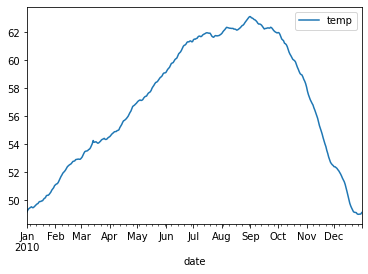

In [5]:
df.resample('D').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

In [6]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

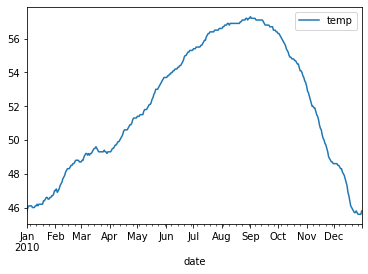

In [7]:
df.resample('D').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

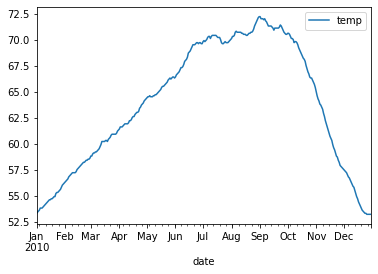

In [8]:
df.resample('D').max().plot()

4. Which month is the coldest, on average?

In [9]:
# january
df.resample('M').mean().sort_values('temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


5. Which month has the highest average temperature?

In [10]:
#september
df.resample('M').mean().sort_values('temp', ascending=False)

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
min_max_temp = df.resample('D').agg(['min', 'max'])
min_max_temp

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [12]:
min_max_temp['change'] = min_max_temp['temp']['max']-min_max_temp['temp']['min']
min_max_temp

temp       change
             min   max       
date                         
2010-01-01  45.8  53.3    7.5
2010-01-02  46.0  53.4    7.4
2010-01-03  46.1  53.5    7.4
2010-01-04  46.1  53.6    7.5
2010-01-05  46.1  53.8    7.7
...          ...   ...    ...
2010-12-27  45.6  53.2    7.6
2010-12-28  45.6  53.2    7.6
2010-12-29  45.6  53.2    7.6
2010-12-30  45.6  53.2    7.6
2010-12-31  45.8  53.2    7.4

[365 rows x 3 columns]

In [13]:
#september had the highest change
min_max_temp.resample('M').change.mean().sort_values()

date
2010-12-31     7.925806
2010-01-31     8.341935
2010-02-28     9.485714
2010-11-30    10.236667
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-10-31    13.432258
2010-08-31    13.870968
2010-06-30    13.950000
2010-07-31    13.977419
2010-09-30    14.403333
Name: change, dtype: float64

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

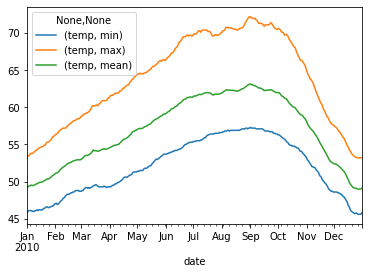

In [14]:
stats_temp = df.resample('D').agg(['min', 'max', 'mean'])
stats_temp.plot()

## `seattle_weather`

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [15]:
df = data.seattle_weather().set_index('date')
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


- Which year and month combination has the highest amount of precipitation?

In [16]:
#2014 had the highest precipitation
df.resample('Y').precipitation.sum().sort_values(ascending=False)

date
2014-12-31    1232.8
2012-12-31    1226.0
2015-12-31    1139.2
2013-12-31     828.0
Name: precipitation, dtype: float64

In [17]:
# december 2015 had the highest precipitation
# March 2014 was the wettest month in the wettest year
df.resample('M').precipitation.sum().sort_values(ascending=False)[:3]

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
Name: precipitation, dtype: float64

- Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

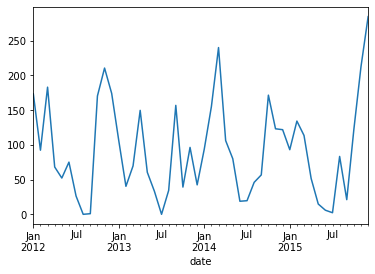

In [18]:
df.resample('M').precipitation.sum().plot()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Wind seems pretty variable over time of day, so do it by day.  But this makes for a busy plot, so maybe by month.  In reality, this is decided by use case.

<AxesSubplot:xlabel='date'>

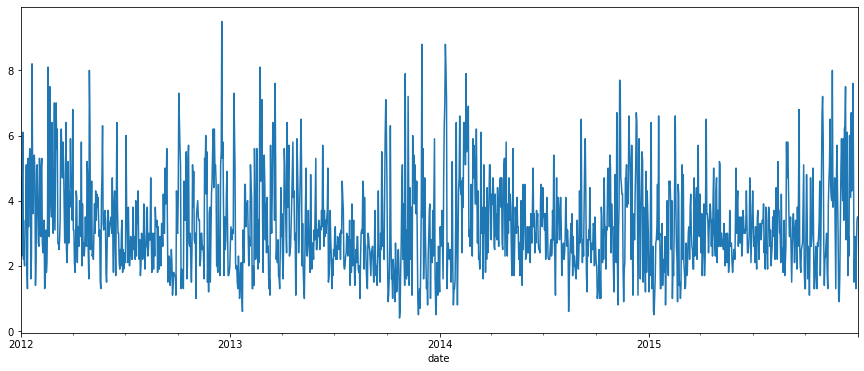

In [19]:
plt.figure(figsize = (15, 6))
df.resample('D').wind.mean().plot()

<AxesSubplot:xlabel='date'>

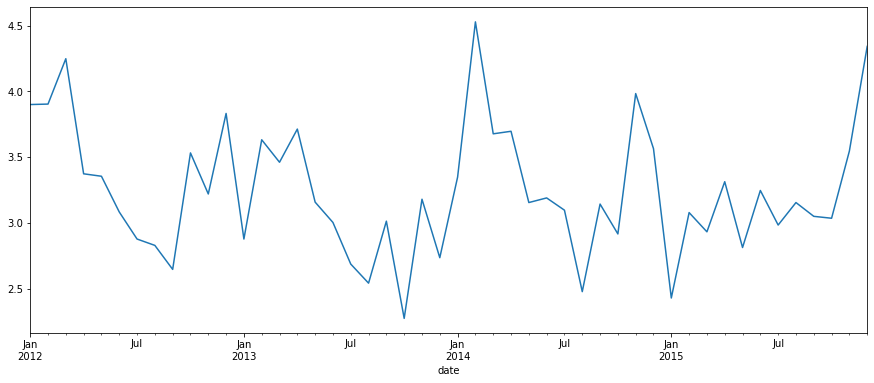

In [20]:
plt.figure(figsize = (15, 6))
df.resample('M').wind.mean().plot()

- Which year-month combination is the windiest?

In [21]:
#2014 had at least half year with winds over 3.1
df.resample('Y').wind.median().sort_values(ascending=False)

date
2014-12-31    3.10
2012-12-31    3.05
2015-12-31    2.90
2013-12-31    2.70
Name: wind, dtype: float64

In [22]:
#Feb 2014 had at least half the days with winds over 4.55
df.resample('M').wind.median().sort_values(ascending=False)[:3]

date
2014-02-28    4.55
2012-01-31    4.50
2015-12-31    4.30
Name: wind, dtype: float64

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [23]:
#2014 had the most sunny days
df.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

- In which month does it rain the most?

This could mean two things: 1) the rainest month in the data set or 2) which month is usally the rainiest (avg over all the same mont for every year of the dataset)

In [24]:
#Nov 2014 had the most rainy days
df[df.weather == 'rain'].resample('M').weather.value_counts().sort_values(ascending=False)[:3]

date        weather
2012-11-30  rain       25
2013-02-28  rain       23
2012-12-31  rain       23
Name: weather, dtype: int64

In [56]:
#november is the rainiest month on average
df = df.reset_index()
df['month'] = df.date.dt.month
df.groupby('month').precipitation.mean().sort_values(ascending=False)[:3]

month
11    5.354167
12    5.021774
3     4.888710
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of precipitation?

Assume this is asking for a proportion of days of the month where precipitation > 0.

In [55]:
#december 2012 had the highest proportion of days with precipitation > 0
precip_prop = df[df.precipitation > 0].set_index('date').resample('M').precipitation.count()/df.set_index('date').resample('M').precipitation.count()
precip_prop.sort_values(ascending=False)[:3]

date
2012-12-31    0.870968
2015-12-31    0.806452
2012-01-31    0.709677
Name: precipitation, dtype: float64

In [66]:
#decembers had the highest proportion of days where precipitation > 0
(df[df.precipitation > 0].groupby('month').precipitation.count()/df.groupby('month').month.count()).sort_values(ascending=False)[:3]

month
12    0.653226
2     0.646018
11    0.591667
dtype: float64